#                                     Case study on Supervised learning

Do the following in the iris dataset.

1. Read the dataset to the python environment.

2. Do necessary pre-processing steps.

3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)


In [165]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import dataset

In [166]:
data = pd.read_excel("iris.xls")
data.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [167]:
data.shape

(150, 5)

### We can see that there are 150 rows and 5 columns in the data set.

In [168]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### There are no missing values in the dataset.

# Handling_outliers

Text(0.5, 1.0, 'Box plot of Sepal Length')

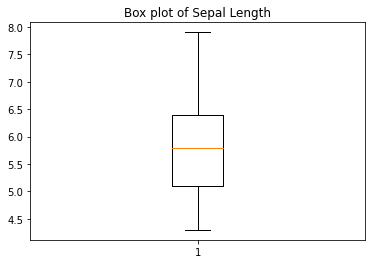

In [169]:
plt.boxplot(data['SL'])
plt.title('Box plot of Sepal Length')

### There are no outliers present in the Sepal Length Column.

Text(0.5, 1.0, 'Box plot of Sepal Width')

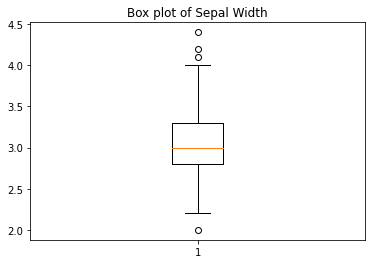

In [170]:
plt.boxplot(data['SW'])
plt.title('Box plot of Sepal Width')

### In Sepal Width column, outliers are present.  

### Removing the outliers

In [171]:
Q1 = np.percentile(data['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SW'], 75, interpolation='midpoint')
IQR = Q3-Q1
low_lim = Q1- 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [172]:
outlier = []
for x in data['SW']:
    if(x>up_lim) or (x < low_lim):
        outlier.append(x)

In [173]:
outlier

[4.4, 4.1, 4.2, 2.0]

In [174]:
ind1 = data['SW']>up_lim
data.loc[ind1].index

Int64Index([15, 32, 33], dtype='int64')

In [175]:
data.drop([ 15, 32, 33],inplace = True)

### Checking whether outliers are present in Sepal Width column.

Text(0.5, 1.0, 'Box plot of Sepal Width')

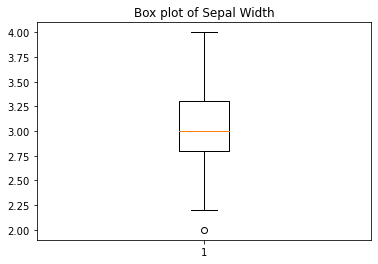

In [176]:
plt.boxplot(data['SW'])
plt.title('Box plot of Sepal Width')

Text(0.5, 1.0, 'Box plot of Petal Length')

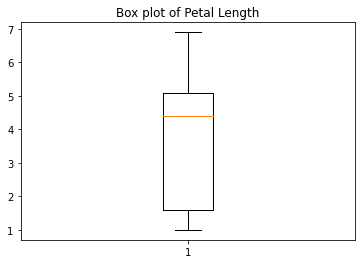

In [177]:
plt.boxplot(data['PL'])
plt.title('Box plot of Petal Length')

Text(0.5, 1.0, 'Box plot of Petal Width')

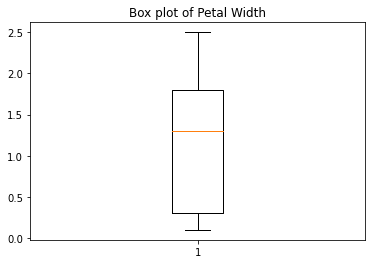

In [178]:
plt.boxplot(data['PW'])
plt.title('Box plot of Petal Width')

### Outliers are not present in Sepal Width,Petal Length and Petal Width columns.

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              147 non-null    float64
 1   SW              147 non-null    float64
 2   PL              147 non-null    float64
 3   PW              147 non-null    float64
 4   Classification  147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


### This shows data type of column names. 

In [180]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

### Display the column names

In [181]:
data['Classification'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        47
Name: Classification, dtype: int64

In [182]:
x = data.drop(['Classification'],axis = 1)# features
y =pd.DataFrame(data['Classification']) #target


### Label Encoding

In [183]:
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
 
data['Classification']= label_encoder.fit_transform(data['Classification'])

In [184]:
data.head(100)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2


# feature engineering

In [185]:
x['total_values']=x[['SL', 'SW', 'PL', 'PW']].sum(axis =1)

In [186]:
x.columns

Index(['SL', 'SW', 'PL', 'PW', 'total_values'], dtype='object')

### splitting the data into train n test

In [187]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)# 70% training data and 30% test data

In [188]:
x_train.shape

(102, 5)

In [189]:
y_train.shape

(102, 1)

In [190]:
x_test.shape

(45, 5)

In [191]:
y_test.shape

(45, 1)

### Here 105 datapoints are given for training and 45 datapoints for testing.

In [192]:

from sklearn.linear_model import LogisticRegression
#have to create instance of the model then storing it to a variable
logit_model = LogisticRegression()
#fit this into x train and y train to create the model
logit_model.fit(x_train, y_train)
# we have to predict the values in x test using this model created and storing those values to y_pred

y_pred = logit_model.predict(x_test)

C:\Users\johns\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\johns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [193]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score

In [194]:

print("Accuracy is : ", accuracy_score(y_test, y_pred))
print("Precision is : " ,precision_score(y_test, y_pred,average='macro'))
print("Recall is : " ,recall_score(y_test, y_pred, average='macro'))
print("f1 score is : " ,f1_score(y_test, y_pred, average='macro'))

Accuracy is :  1.0
Precision is :  1.0
Recall is :  1.0
f1 score is :  1.0


In [195]:
cm = confusion_matrix(y_test, y_pred)

In [196]:
cm_df = pd.DataFrame(cm, index = ['SETOSA','VERSICOLR','VIRGINICA'], columns = ['SETOSA','VERSICOLR','VIRGINICA'])
cm_df

,SETOSA,VERSICOLR,VIRGINICA
SETOSA,16,0,0
VERSICOLR,0,14,0
VIRGINICA,0,0,15


# KNN Model

In [197]:
from sklearn.neighbors import KNeighborsClassifier

In [198]:
acc_values = []
neighbors = np.arange(3,15)
# creating a loop for each K value
for k in neighbors:
#taking the instance of KNN to a variable.the variable's name is classifier.
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski')#no: of neighbors n the methode to measure the distance .instance is created
#to create the model.
    classifier.fit(x_train,y_train)
#have to predict output using this model.
    y_pred = classifier.predict(x_test)#KNN is created
#append the accuracy values to empty list 
    acc = accuracy_score(y_test, y_pred)#taking accuracy values to variable acc 
#append these accuracy values to the list
    acc_values.append(acc)

C:\Users\johns\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\johns\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\johns\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\johns\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [199]:
acc_values 

[1.0,
 1.0,
 1.0,
 1.0,
 0.9777777777777777,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9777777777777777]

Text(0, 0.5, 'accuracy')

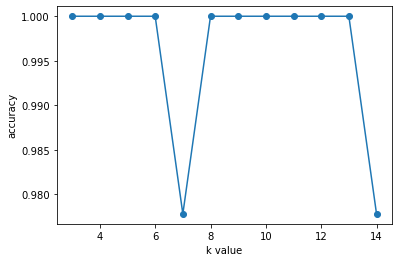

In [200]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [201]:
classifier = KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

C:\Users\johns\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [202]:
#have to print all these.compare y_test and y_pred
print("Accuracy is : ", accuracy_score(y_test, y_pred))
print("Precision is : " ,precision_score(y_test, y_pred,average='macro'))
print("Recall is : " ,recall_score(y_test, y_pred, average='macro'))
print("f1 score is : " ,f1_score(y_test, y_pred, average='macro'))

Accuracy is :  1.0
Precision is :  1.0
Recall is :  1.0
f1 score is :  1.0


In [203]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = ['SETOSA','VERSICOLR','VIRGINICA'], columns = ['SETOSA','VERSICOLR','VIRGINICA'])
cm_df

,SETOSA,VERSICOLR,VIRGINICA
SETOSA,16,0,0
VERSICOLR,0,14,0
VIRGINICA,0,0,15


In [204]:
data.describe()

,SL,SW,PL,PW,Classification
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.851020,3.029932,3.805442,1.218367,1.020408
std,0.834231,0.402971,1.751273,0.757973,0.814840
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.000000,6.900000,2.500000,2.000000


In [205]:
cm = confusion_matrix(y_test, y_pred)

In [206]:
cm_df = pd.DataFrame(cm, index = ['SETOSA','VERSICOLR','VIRGINICA'], columns = ['SETOSA','VERSICOLR','VIRGINICA'])
cm_df

,SETOSA,VERSICOLR,VIRGINICA
SETOSA,16,0,0
VERSICOLR,0,14,0
VIRGINICA,0,0,15


### Decision tree 

In [207]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred = dt_model.predict(x_test)
print('Accuracy on Decision tree model is', accuracy_score(y_test,y_pred))

Accuracy on Decision tree model is 0.9777777777777777


In [208]:
y_test.value_counts()

Classification 
Iris-setosa        16
Iris-virginica     15
Iris-versicolor    14
dtype: int64

In [209]:
cm = confusion_matrix(y_test, y_pred)

In [210]:
cm_df = pd.DataFrame(cm, index = ['SETOSA','VERSICOLR','VIRGINICA'], columns = ['SETOSA','VERSICOLR','VIRGINICA'])
cm_df

,SETOSA,VERSICOLR,VIRGINICA
SETOSA,16,0,0
VERSICOLR,0,14,0
VIRGINICA,0,1,14


# Support Vector Machine

### Linear SVM

In [211]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')#creating an instance
svm_linear.fit(x_train,y_train)
y_pred = svm_linear.predict(x_test)
print('Accuracy using linear svm is ', accuracy_score(y_test,y_pred))

Accuracy using linear svm is  1.0


C:\Users\johns\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Polynomial SVM

In [212]:
svm_poly = SVC(kernel = 'poly', degree=3)
svm_poly.fit(x_train,y_train)
y_pred = svm_poly.predict(x_test)
print("Accuracy is", accuracy_score(y_test,y_pred))


Accuracy is 1.0


C:\Users\johns\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Radial SVM

In [213]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred = svm_radial.predict(x_test)
print("Accuracy is", accuracy_score(y_test,y_pred))

Accuracy is 0.9555555555555556


C:\Users\johns\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Random Forest

In [214]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(x_train,y_train)#training the model

y_pred=rf.predict(x_test)#to make predictions

<ipython-input-214-7bdfd9ec6512>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)#training the model


In [215]:
from sklearn.metrics import f1_score,confusion_matrix
print('Accuracy using Random Forest is ', accuracy_score(y_test,y_pred))
print('\nf1 Score is ', f1_score( y_test,y_pred,average='macro'))


Accuracy using Random Forest is  1.0

f1 Score is  1.0


In [216]:
cm = confusion_matrix(y_test, y_pred)

In [217]:
cm_df = pd.DataFrame(cm, index = ['SETOSA','VERSICOLR','VIRGINICA'], columns = ['SETOSA','VERSICOLR','VIRGINICA'])
cm_df

,SETOSA,VERSICOLR,VIRGINICA
SETOSA,16,0,0
VERSICOLR,0,14,0
VIRGINICA,0,0,15


# feature importance

In [218]:
pd.Series(rf.feature_importances_)

0    0.054858
1    0.036069
2    0.336926
3    0.379530
4    0.192618
dtype: float64

### fine tuning of hyper parameters

In [219]:
rf.fit(x_train,y_train)

<ipython-input-219-895403b03771>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier()

In [220]:
rft= RandomForestClassifier(n_estimators=500,max_depth=10,random_state =42,criterion='entropy')

In [221]:
rft.fit(x_train,y_train)

<ipython-input-221-c26e1322ddde>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rft.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500,
                       random_state=42)

In [222]:
y_pred=rft.predict(x_test)
f1_score(y_test,y_pred, average='macro')

1.0

### We can see the f1 score is 1 which can result in over fitting. Gradient boosting can result in better performance than random forests.

# Gradient boosting

In [223]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
f1_score(y_test,y_pred,average='macro')

C:\Users\johns\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9770114942528737

### Value of f1 score is nearer to 1 ie,0.977011.We can conclude that it is fine tuned to a good model.

# Extreme Gradient Boosting

In [224]:
pip install xgboost

In [225]:
from xgboost import XGBClassifier
#creating an instance
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred= xgb.predict(x_test)
f1_score(y_test,y_pred,average='macro')

[18:45:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\johns\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\johns\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


1.0

### In extreme gradient boosting also we got f1 score is 0.9770114942528737. This also results in good efficent model.